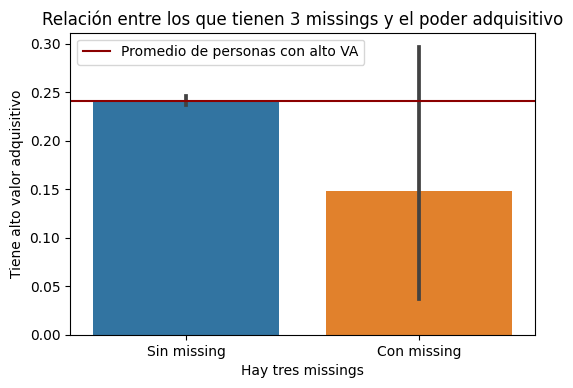

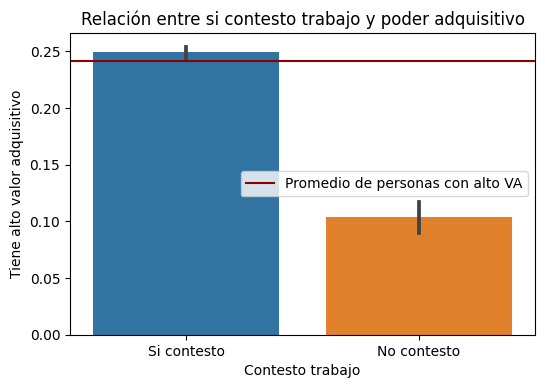

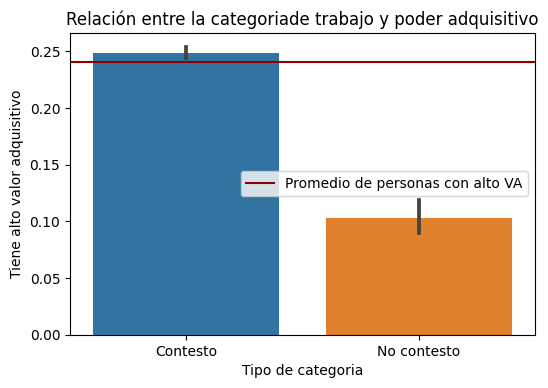

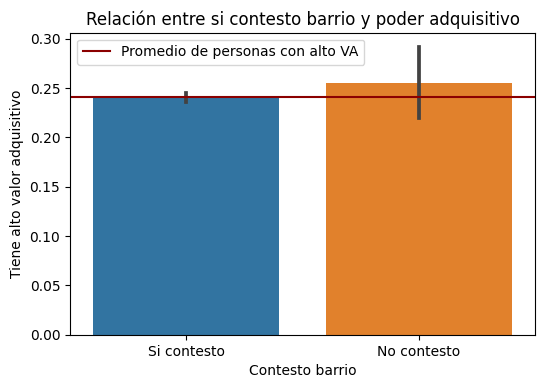

In [1]:
%run "../Secciones/feature_engineering.ipynb"

### Ganancia

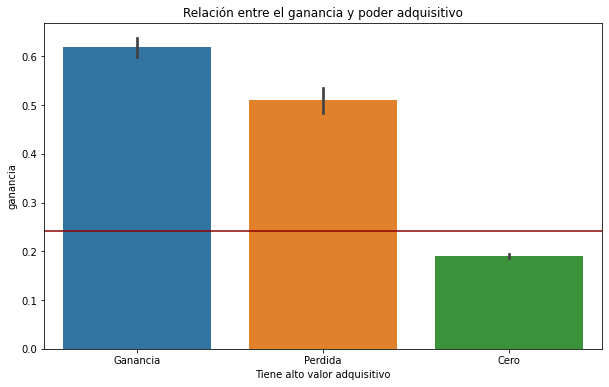

In [2]:
def categorizar_ganancia(ganancia):
    if ganancia == 0:
        return 'Cero'
    elif ganancia < 0:
        return 'Perdida'
    else:
        return 'Ganancia'

df_ganancia = df[['ganancia_perdida_declarada_bolsa_argentina','tiene_alto_valor_adquisitivo']].copy()
df_ganancia['ganancia'] = df_ganancia['ganancia_perdida_declarada_bolsa_argentina'].apply(categorizar_ganancia)
df_ganancia['ganancia'].value_counts()

#BARPLOT
plt.figure(figsize=(10, 6))
indices = df_ganancia.groupby('ganancia')['tiene_alto_valor_adquisitivo'].aggregate(lambda x: np.mean(x))

ax = sns.barplot(
    data=df_ganancia,
    x='ganancia',
    y='tiene_alto_valor_adquisitivo',
    order= indices.sort_values(ascending=False).index)

plt.ylabel("ganancia")
plt.xlabel("Tiene alto valor adquisitivo")
plt.title('Relación entre el ganancia y poder adquisitivo')
prom = df['tiene_alto_valor_adquisitivo'].mean()
plt.axhline(prom, color="darkred", label="Promedio de personas con alto VA")
plt.show()

Cero        28301
Invierte     4226
Name: ganancia, dtype: int64


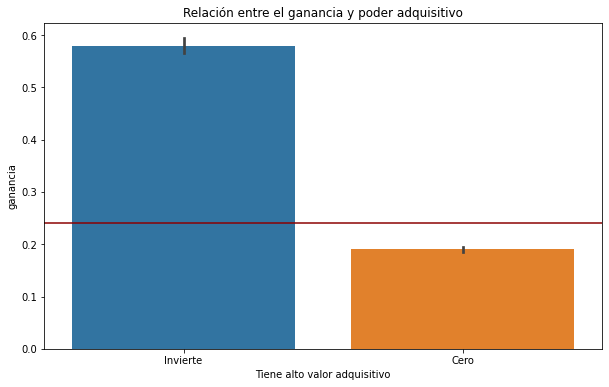

In [3]:
def categorizar_ganancia(ganancia):
    if ganancia == 0:
        return 'Cero'
    else:
        return 'Invierte'

df_ganancia = df[['ganancia_perdida_declarada_bolsa_argentina','tiene_alto_valor_adquisitivo']].copy()
df_ganancia['ganancia'] = df_ganancia['ganancia_perdida_declarada_bolsa_argentina'].apply(categorizar_ganancia)
print(df_ganancia['ganancia'].value_counts())

#BARPLOT
plt.figure(figsize=(10, 6))
indices = df_ganancia.groupby('ganancia')['tiene_alto_valor_adquisitivo'].aggregate(lambda x: np.mean(x))

ax = sns.barplot(
    data=df_ganancia,
    x='ganancia',
    y='tiene_alto_valor_adquisitivo',
    order= indices.sort_values(ascending=False).index)

plt.ylabel("ganancia")
plt.xlabel("Tiene alto valor adquisitivo")
plt.title('Relación entre el ganancia y poder adquisitivo')
prom = df['tiene_alto_valor_adquisitivo'].mean()
plt.axhline(prom, color="darkred", label="Promedio de personas con alto VA")
plt.show()

In [4]:
df_ganancia[df_ganancia['ganancia'] == 'Invierte']['tiene_alto_valor_adquisitivo'].value_counts()

1    2449
0    1777
Name: tiene_alto_valor_adquisitivo, dtype: int64

In [5]:
df_ganancia[df_ganancia['ganancia'] == 'Invierte']['tiene_alto_valor_adquisitivo'].value_counts().tolist()[0]/df_ganancia[df_ganancia['ganancia'] == 'Invierte']['tiene_alto_valor_adquisitivo'].value_counts().sum()

0.5795078088026503

In [6]:
df_ganancia[df_ganancia['ganancia'] == 'Invierte']['tiene_alto_valor_adquisitivo'].value_counts().tolist()[0]/32527

0.0752912964614013

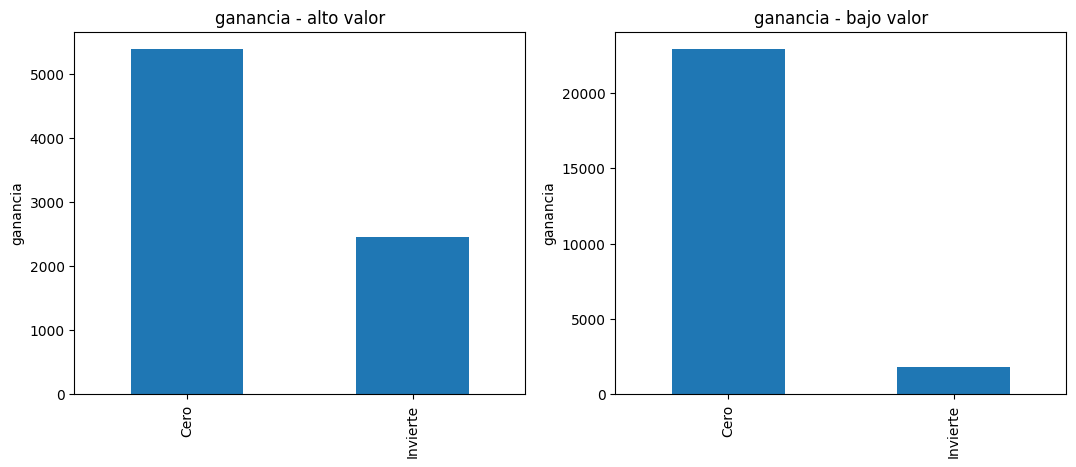

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=100)

df_alto_valor = df_ganancia[df_ganancia['tiene_alto_valor_adquisitivo'] == 1]
df_bajo_valor = df_ganancia[df_ganancia['tiene_alto_valor_adquisitivo'] != 1]

df_alto_valor.ganancia.value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title("ganancia - alto valor")
axes[0].set_ylabel("ganancia")

df_bajo_valor.ganancia.value_counts().plot(kind='bar', ax=axes[1],)
axes[1].set_title("ganancia - bajo valor")
axes[1].set_ylabel("ganancia")

plt.show()

In [8]:
total_alto_valor = df_alto_valor['ganancia'].value_counts().sum()
total_buenos_trabajos = df_alto_valor[df_alto_valor['ganancia'] == 'Invierte'].value_counts().sum()
total_buenos_trabajos/total_alto_valor*100

31.249202500956997

In [9]:
total_alto_valor = df_ganancia['ganancia'].value_counts().sum()
total_buenos_trabajos = df_ganancia[df_ganancia['ganancia'] == 'Invierte'].value_counts().sum()
total_buenos_trabajos/total_alto_valor*100

12.992283333845728

### Estado marital vs ganancia

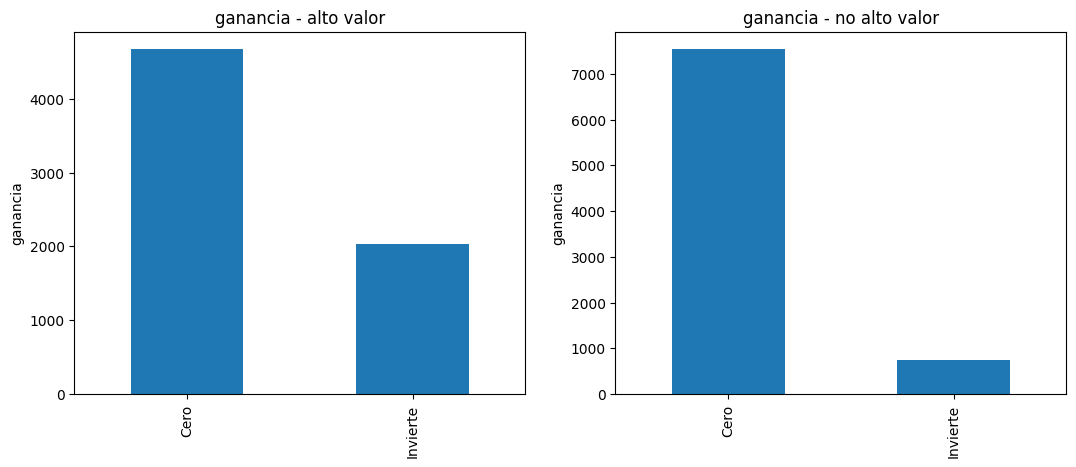

In [10]:
def categorizar_ganancia(ganancia):
    if ganancia == 0:
        return 'Cero'
    else:
        return 'Invierte'

df_ganancia = df[['estado_marital','ganancia_perdida_declarada_bolsa_argentina','tiene_alto_valor_adquisitivo']].copy()
df_ganancia['ganancia'] = df_ganancia['ganancia_perdida_declarada_bolsa_argentina'].apply(categorizar_ganancia)


df_matrimonio = df_ganancia[df_ganancia['estado_marital'] == 'matrimonio']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=100)

df_mat_alto_valor = df_matrimonio[df_matrimonio['tiene_alto_valor_adquisitivo'] == 1]
df_mat_bajo_valor = df_matrimonio[df_matrimonio['tiene_alto_valor_adquisitivo'] != 1]

df_mat_alto_valor.ganancia.value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title("ganancia - alto valor")
axes[0].set_ylabel("ganancia")

df_mat_bajo_valor.ganancia.value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title("ganancia - no alto valor")
axes[1].set_ylabel("ganancia")

plt.show()

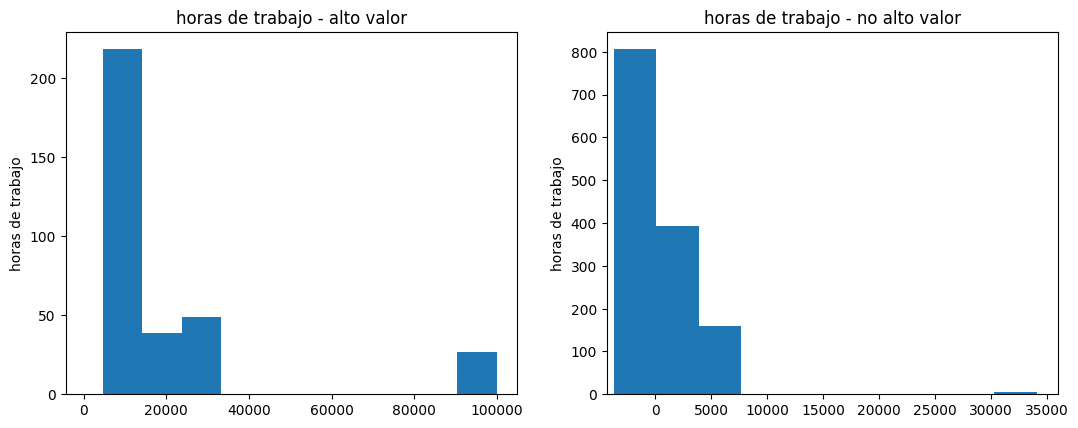

In [13]:
condicion = (df['trabajo'] != 'directivo_gerente') & (df['trabajo'] != 'profesional_especializado') & (df['trabajo'] != 'ventas')
df_nm = df[(df['estado_marital'] != 'matrimonio')]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=100)

df_nm_alto_valor = df_nm[(df_nm['tiene_alto_valor_adquisitivo'] == 1) & (df_nm['ganancia_perdida_declarada_bolsa_argentina'] > 0)]
df_nm_bajo_valor = df_nm[df_nm['tiene_alto_valor_adquisitivo'] != 1 & (df_nm['ganancia_perdida_declarada_bolsa_argentina'] > 0)]

df_nm_alto_valor.ganancia_perdida_declarada_bolsa_argentina.plot(kind='hist', ax=axes[0], xlim=df_nm.ganancia_perdida_declarada_bolsa_argentina.min())
axes[0].set_title("horas de trabajo - alto valor")
axes[0].set_ylabel("horas de trabajo")

df_nm_bajo_valor.ganancia_perdida_declarada_bolsa_argentina.plot(kind='hist', ax=axes[1], xlim=df_nm.ganancia_perdida_declarada_bolsa_argentina.min())
axes[1].set_title("horas de trabajo - no alto valor")
axes[1].set_ylabel("horas de trabajo")

plt.show()

In [20]:
df_nm_alto_valor.value_counts().sum()/df_alto_valor.value_counts().sum() * 100

4.249074901110118

In [14]:
df_nm_alto_valor

,anios_estudiados,barrio,categoria_de_trabajo,edad,estado_marital,ganancia_perdida_declarada_bolsa_argentina,genero,horas_trabajo_registradas,religion,rol_familiar_registrado,tiene_alto_valor_adquisitivo,trabajo,comuna
8,18,Palermo,relacion_de_dependencia,31,sin_matrimonio,14084,mujer,50,cristianismo,sin_familia,1,profesional_especializado,C14
84,13,Palermo,relacion_de_dependencia,44,divorciado,14344,mujer,40,cristianismo,sin_familia,1,reparador,C14
197,18,Palermo,empleadao_estatal,40,sin_matrimonio,14084,mujer,55,cristianismo,sin_familia,1,directivo_gerente,C14
665,16,Palermo,relacion_de_dependencia,42,divorciado,8614,mujer,40,cristianismo,soltero_a,1,profesional_especializado,C14
704,20,Palermo,relacion_de_dependencia,46,divorciado,25236,mujer,65,cristianismo,soltero_a,1,profesional_especializado,C14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32123,14,Palermo,empleadao_estatal,44,sin_matrimonio,13550,hombre,50,cristianismo,sin_familia,1,entretenimiento,C14
32164,17,Palermo,relacion_de_dependencia,35,sin_matrimonio,10520,hombre,45,cristianismo,sin_familia,1,ventas,C14
32341,17,Villa Urquiza,monotibutista,74,viudo_a,15831,hombre,8,cristianismo,sin_familia,1,reparador,C12
32370,19,San Isidro,monotibutista,53,sin_matrimonio,27828,hombre,40,budismo,sin_familia,1,profesional_especializado,San Isidro


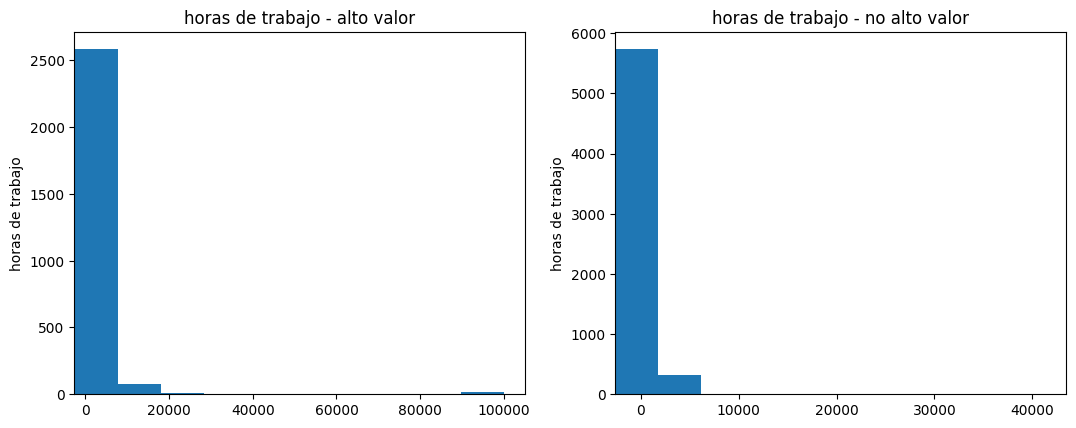

In [22]:
condicion = (df['trabajo'] != 'directivo_gerente') & (df['trabajo'] != 'profesional_especializado') & (df['trabajo'] != 'ventas')
df_sm_st = df[(df['estado_marital'] == 'matrimonio') & condicion]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=100)

df_sm_st_alto_valor = df_sm_st[(df_sm_st['tiene_alto_valor_adquisitivo'] == 1)]# & (df_sm_st['ganancia_perdida_declarada_bolsa_argentina'] > 0)]
df_sm_st_bajo_valor = df_sm_st[df_sm_st['tiene_alto_valor_adquisitivo'] != 1]# & (df_sm_st['ganancia_perdida_declarada_bolsa_argentina'] > 0)]

df_sm_st_alto_valor.ganancia_perdida_declarada_bolsa_argentina.plot(kind='hist', ax=axes[0], xlim=df_sm_st.ganancia_perdida_declarada_bolsa_argentina.min())
axes[0].set_title("horas de trabajo - alto valor")
axes[0].set_ylabel("horas de trabajo")

df_sm_st_bajo_valor.ganancia_perdida_declarada_bolsa_argentina.plot(kind='hist', ax=axes[1], xlim=df_sm_st.ganancia_perdida_declarada_bolsa_argentina.min())
axes[1].set_title("horas de trabajo - no alto valor")
axes[1].set_ylabel("horas de trabajo")

plt.show()

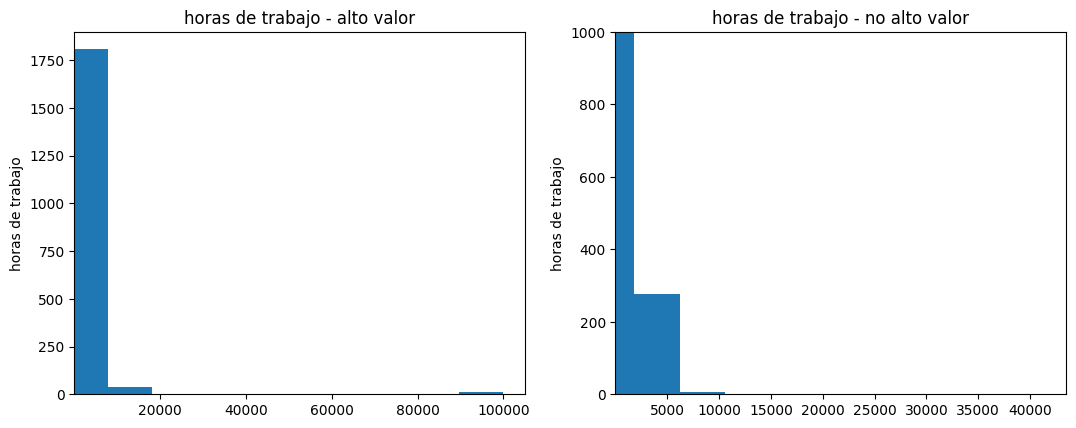

In [23]:
condicion_trabajo = (df['trabajo'] != 'directivo_gerente') & (df['trabajo'] != 'profesional_especializado') & (df['trabajo'] != 'ventas')
df_sm_nt_ne = df[(df['estado_marital'] == 'matrimonio') & (condicion_trabajo) & (df['anios_estudiados'] < 14.5)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=100)

df_sm_nt_ne_alto_valor = df_sm_nt_ne[df_sm_nt_ne['tiene_alto_valor_adquisitivo'] == 1]
df_sm_nt_ne_bajo_valor = df_sm_nt_ne[df_sm_nt_ne['tiene_alto_valor_adquisitivo'] != 1]

df_sm_nt_ne_alto_valor.ganancia_perdida_declarada_bolsa_argentina.plot(kind='hist', ax=axes[0], xlim=df_sm_nt_ne.horas_trabajo_registradas.min())
axes[0].set_title("horas de trabajo - alto valor")
axes[0].set_ylabel("horas de trabajo")

df_sm_nt_ne_bajo_valor.ganancia_perdida_declarada_bolsa_argentina.plot(kind='hist', ax=axes[1], xlim=df_sm_nt_ne.horas_trabajo_registradas.min(), ylim=[0, 1000])
axes[1].set_title("horas de trabajo - no alto valor")
axes[1].set_ylabel("horas de trabajo")

plt.show()